<a href="https://colab.research.google.com/github/joserobertofox/datascience/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MVP de Análise de Dados e Boas Práticas**
# **Aluno: José Roberto Assis Silva**
  

# **1. Definição do Problema**

O dataset que será utilizado neste projeto e o **HCV Data Set** que contém dados para previsão de hepatite C. A fonte deste dataset temo como doador: Ralf Lichtinghagen: Instituto de Química Clínica; Universidade de Medicina de Hannover (MHH); Hannover, Alemanha. O conjunto de dados contém valores laboratoriais de doadores de sangue e pacientes com hepatite C e valores demográficos como idade e será tratado como um problema de aprendizado supervisionado. Estes atributos de exames laboratoriais contém varíaveis preditoras ao atributo alvo (variável de classe) para classificar se os doadores têm ou não hepatite C. A variável de classe é **CATEGORY (valores: '0=Doador de Sangue', '0s=Doador de Sangue suspeito', '1=Hepatite', '2=Fibrose', '3=Cirrose')**. Para mais informações sobre este dataset, consulte: https://archive.ics.uci.edu/ml/datasets/HCV+data.

**Atributos do Dataset:**

1. **ID** - ID do paciente N°
2. **Category** - (valores: '0=Doador de Sangue', '0s=Doador de Sangue suspeito', '1=Hepatite', '2=Fibrose', '3=Cirrose')
3. **Age** - Idade em anos
4. **Sex** - Sexo (m/f)
5. **ALB** - 
6. **ALP** - 
7. **ALT** - 
8. **AST** - 
9. **BIL** - 
10. **CHE** - 
11. **CHOL** - 
12. **CREA** - 
13. **GGT** - 
14. **PROT** - 



In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# Configuração para tratamento de erros
import warnings
warnings.filterwarnings("ignore")

# **2. Carga de Dados**

Vou utilizar o pacote Pandas (Python Data Analysis Library) para fazer a carga do arquivo **hcvdata0** em formato **.csv** e a partir do carregamento vou fazer uma análise exploratória.



In [6]:
# Carregamento do arquivo hcvdata0.csv usando Pandas e usando a URL do repositório no GITHUB

# Varíavel recebendo a URL do repositório para onde foi feito o upload do arquivo no GITHUB
url = "https://raw.githubusercontent.com/joserobertofox/datascience/main/hcvdat0.csv"

# Informando o cabeçalho das colunas
colunas = ['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Carregando o arquivo utilizando as descrições informadas das colunas 
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [7]:
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# **3. Análise de Dados**




#3.1. Estatísticas Descritivas



In [10]:
# Mostrando a quantidade de instâncias e quantidade de atributos do dataset
print(dataset.shape)

(615, 13)


In [11]:
# Mostrando os tipos de dados dos atributos do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB
None


In [12]:
# Listando as 15 primeiras linhas do dataset
dataset.head(15)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [13]:
# Listando as 15 últimas linhas do dataset
dataset.tail(15)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
601,3=Cirrhosis,59,m,27.0,73.8,4.0,65.2,209.0,2.47,3.61,71.7,28.5,60.6
602,3=Cirrhosis,59,m,31.0,86.3,5.4,95.4,117.0,1.57,3.51,60.5,53.6,68.5
603,3=Cirrhosis,61,m,39.0,102.9,27.3,143.2,15.0,5.38,4.88,72.3,400.3,73.4
604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0
605,3=Cirrhosis,74,m,23.0,34.1,2.1,90.4,22.0,2.50,3.29,51.0,46.8,57.1
606,3=Cirrhosis,42,f,33.0,79.0,3.7,55.7,200.0,1.72,5.16,89.1,146.3,69.9
607,3=Cirrhosis,49,f,33.0,190.7,1.2,36.3,7.0,6.92,3.82,485.9,112.0,58.5
608,3=Cirrhosis,52,f,39.0,37.0,1.3,30.4,21.0,6.33,3.78,158.2,142.5,82.7
609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5


Após listar as 15 primeiras e as 15 últimas linhas verifiquei que existem valores faltantes em alguns atributos e o atributo CATEGORY contém um valor numérico juntamente com um carácter especial "="  que associa o valor com o diagnóstico. Da forma que este atributo está não poderemos fazer uma análise estatística do mesmo a não ser que convertemos o atributo para valor númerico. Na fase de processamento de dados poderemos fazer uma conversão deste atributo somente para um valor inteiro.

In [14]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [15]:
# Fazendo um resumo estatístico dos atributos númericos do Dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [16]:
# Distribuição dos valores da classe Category para verificar desbalanceamento da classe
print(dataset.groupby('Category').size())

Category
0=Blood Donor             533
0s=suspect Blood Donor      7
1=Hepatitis                24
2=Fibrosis                 21
3=Cirrhosis                30
dtype: int64


Analisando a distribuição dos valores da classe CATEGORY acima, cheguei a conclusão que existe uma ocorrência bem excessiva na categoria 0=Blood Donor em contrapartida aos outros valores, caracterizando assim um desbalanceamento de classe. Como esta variável é qualitativa vou representar suas incidências em um gráfico de barras abaixo.

<Axes: xlabel='Category'>

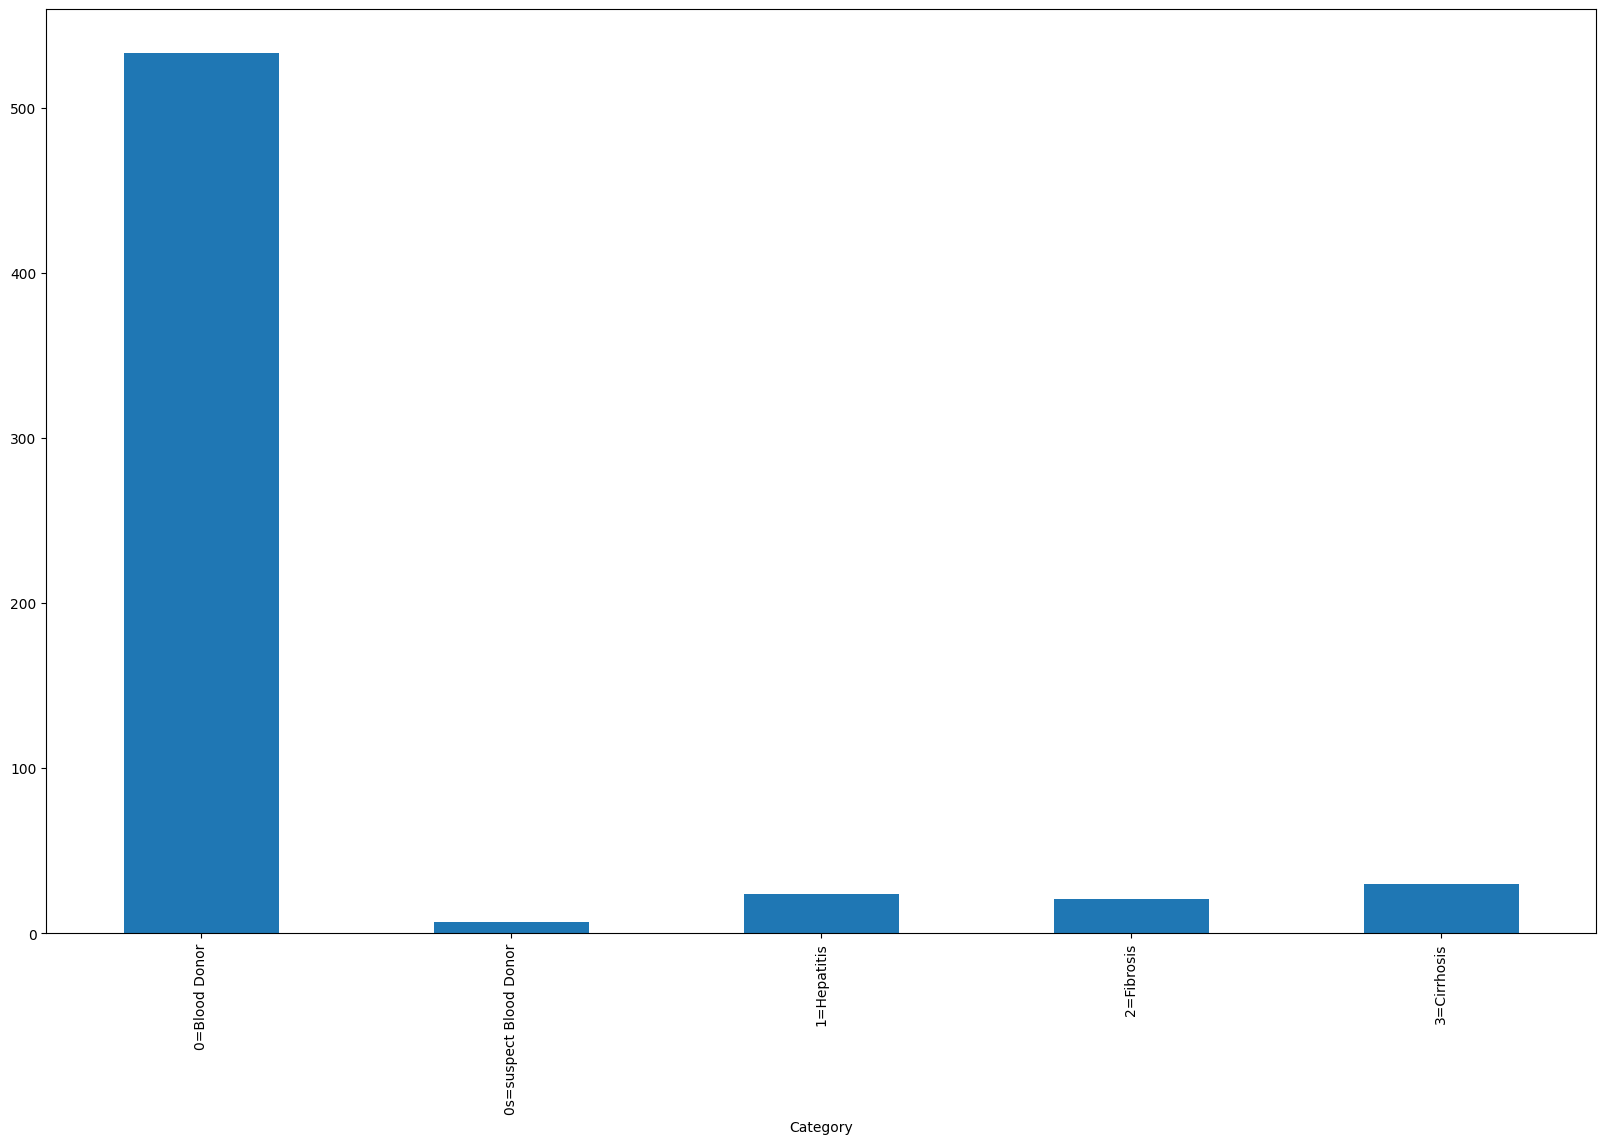

In [49]:
dataset.groupby(['Category'])['Category'].count().plot.bar(figsize=(20,12))

In [17]:
# Distribuição de valores do atributo Sex
print(dataset.groupby('Sex').size())

Sex
f    238
m    377
dtype: int64


Após verificar as ocorrências da variável qualitativa **SEX** acima, vou plotar um grafico de pizza (pie plot) para demonstrar as quantidades e percentuais deste atributo.

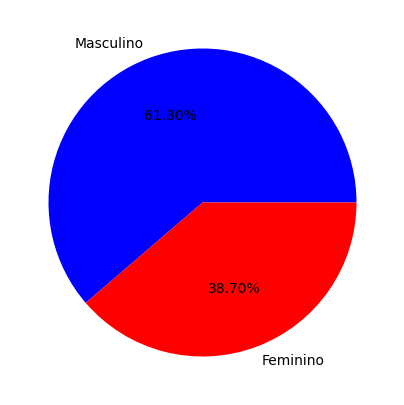

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=dataset['Sex'].value_counts(), 
        colors=["blue","red"], 
        labels=["Masculino","Feminino"], 
        autopct="%1.2f%%", 
        )
plt.show()

# 3.2. Visualizações Unimodais

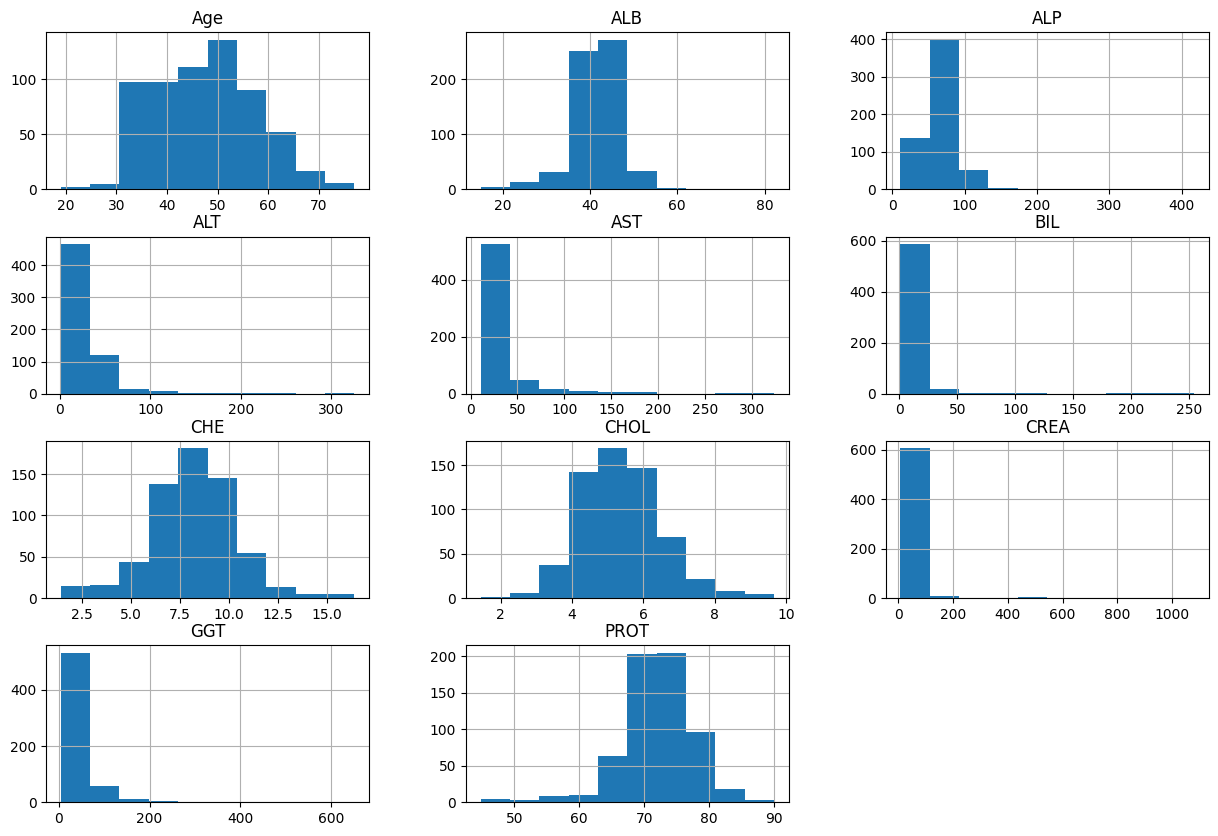

In [19]:
# Plotagem do Histograma para os atributos do dataset para visualizar a distribuição dos valores de cada atributo
dataset.hist(figsize = (15,10))
plt.show()

Após plotagem do histograma para cada atributo cheguei as seguintes concluões:
* Nenhum atributo têm distribuição exponencial.
* AGE,AST,ALT,CHE,CHOL e PROT têm distribuição aproximadamente normal.
* GGT,CREA,ALP,ALB e BIL têm distribuição anormal (distorcida).

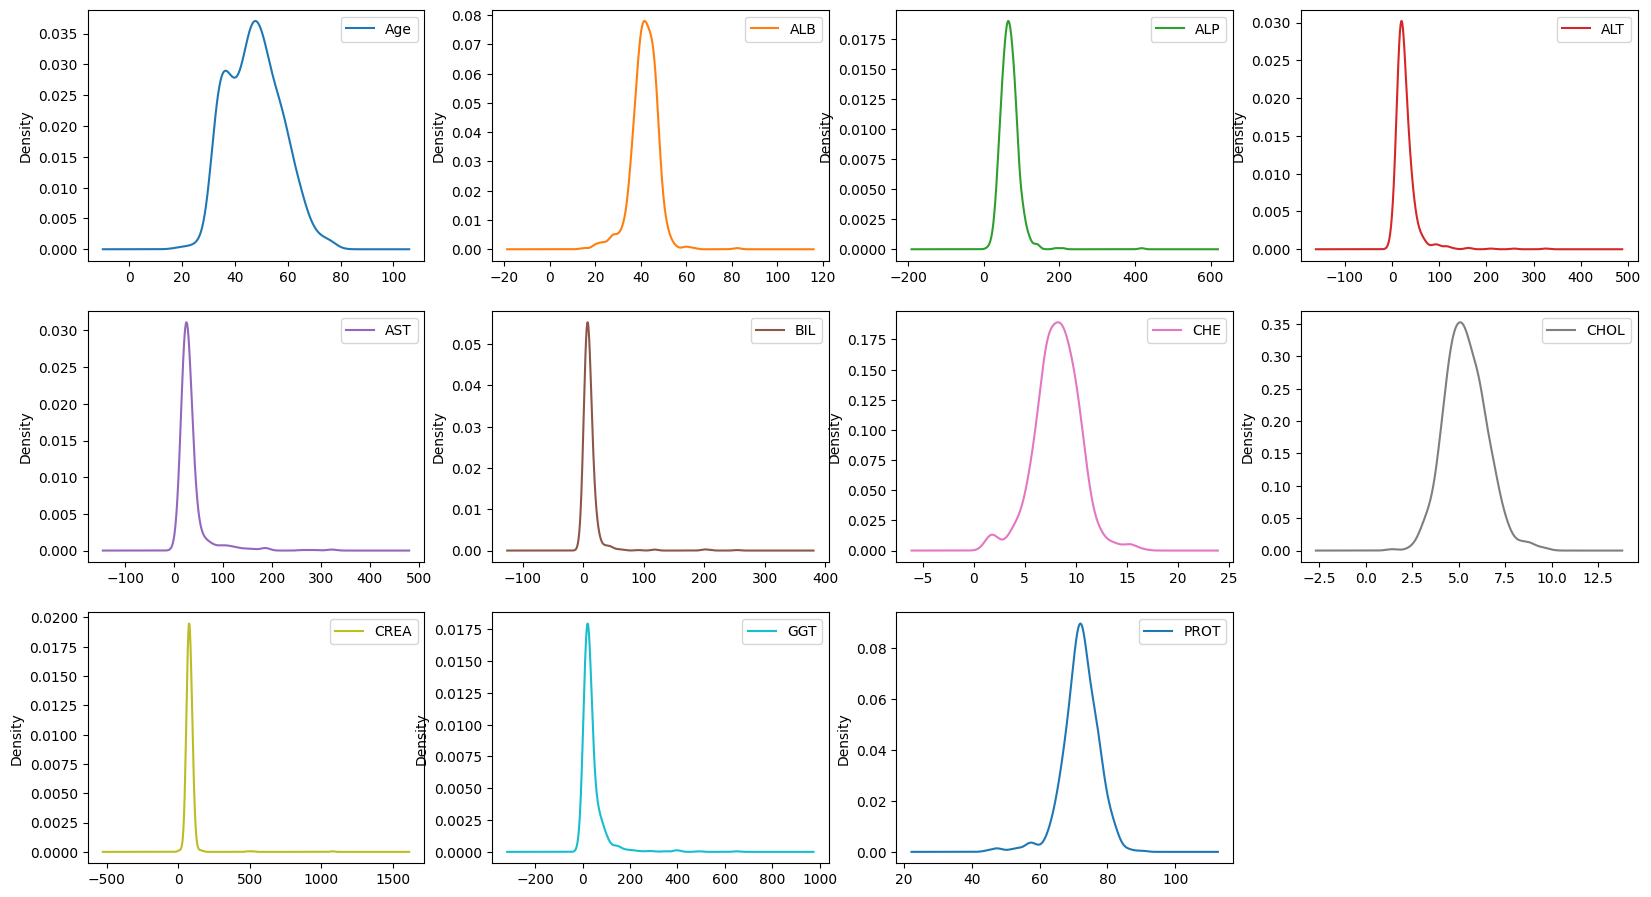

In [20]:
# Plotagem o gráfico Density Plot para cada atributo do dataset para também visualizar a distribuição do valores dos atributos
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (20,15))
plt.show()

Com a plotagem do Gráfico de Densidade, ou Density Plot acima, visualizamos também a distribuição dos atributos do dataset e notamos que os gráficos com a abertura maior da onda significam que tem uma distribuição aproximadamente normal.

<function matplotlib.pyplot.show(close=None, block=None)>

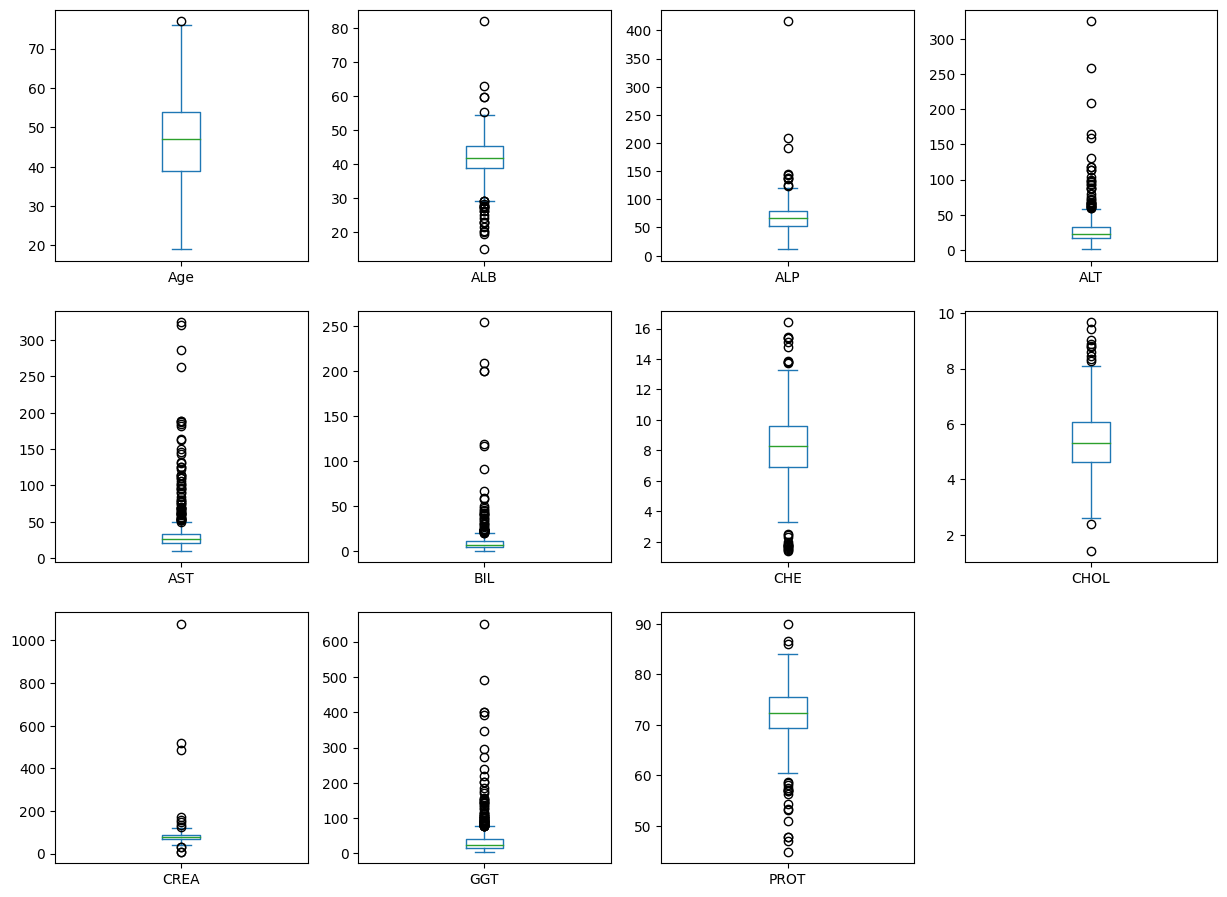

In [38]:
# Plotagem do diagrama de caixas(Boxplot) para analisarmos a dispersão do dataset e possíveis outliers
dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,15))
plt.show

Após a postagem do Boxplot, que representa a distribuição dos dados, verifiquei que a dispersão dos atributos são bem distintas e há a existências de outliers como ficou bem evidenciado nos atributos ALB,ALP,ALT,CREA devido ao pontos estarem muito distantes da média acima de 3 desvios padrão além do gráfico do Boxplot, ou seja fora do limite razoável dos dados. A linha verde representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75).

# 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis,
Próximo de +1: há uma correlação positiva entre as variáveis.
0: não há correlação entre as variáveis.
OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

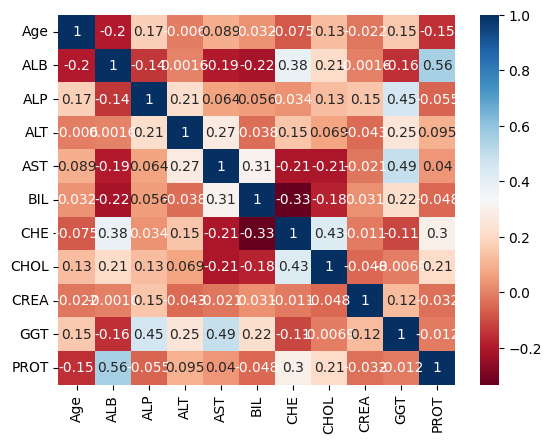

In [39]:
# Matriz de Correlação com Matplotlib Seaborn exibe graficamente a correlação entre os atributos numéricos
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

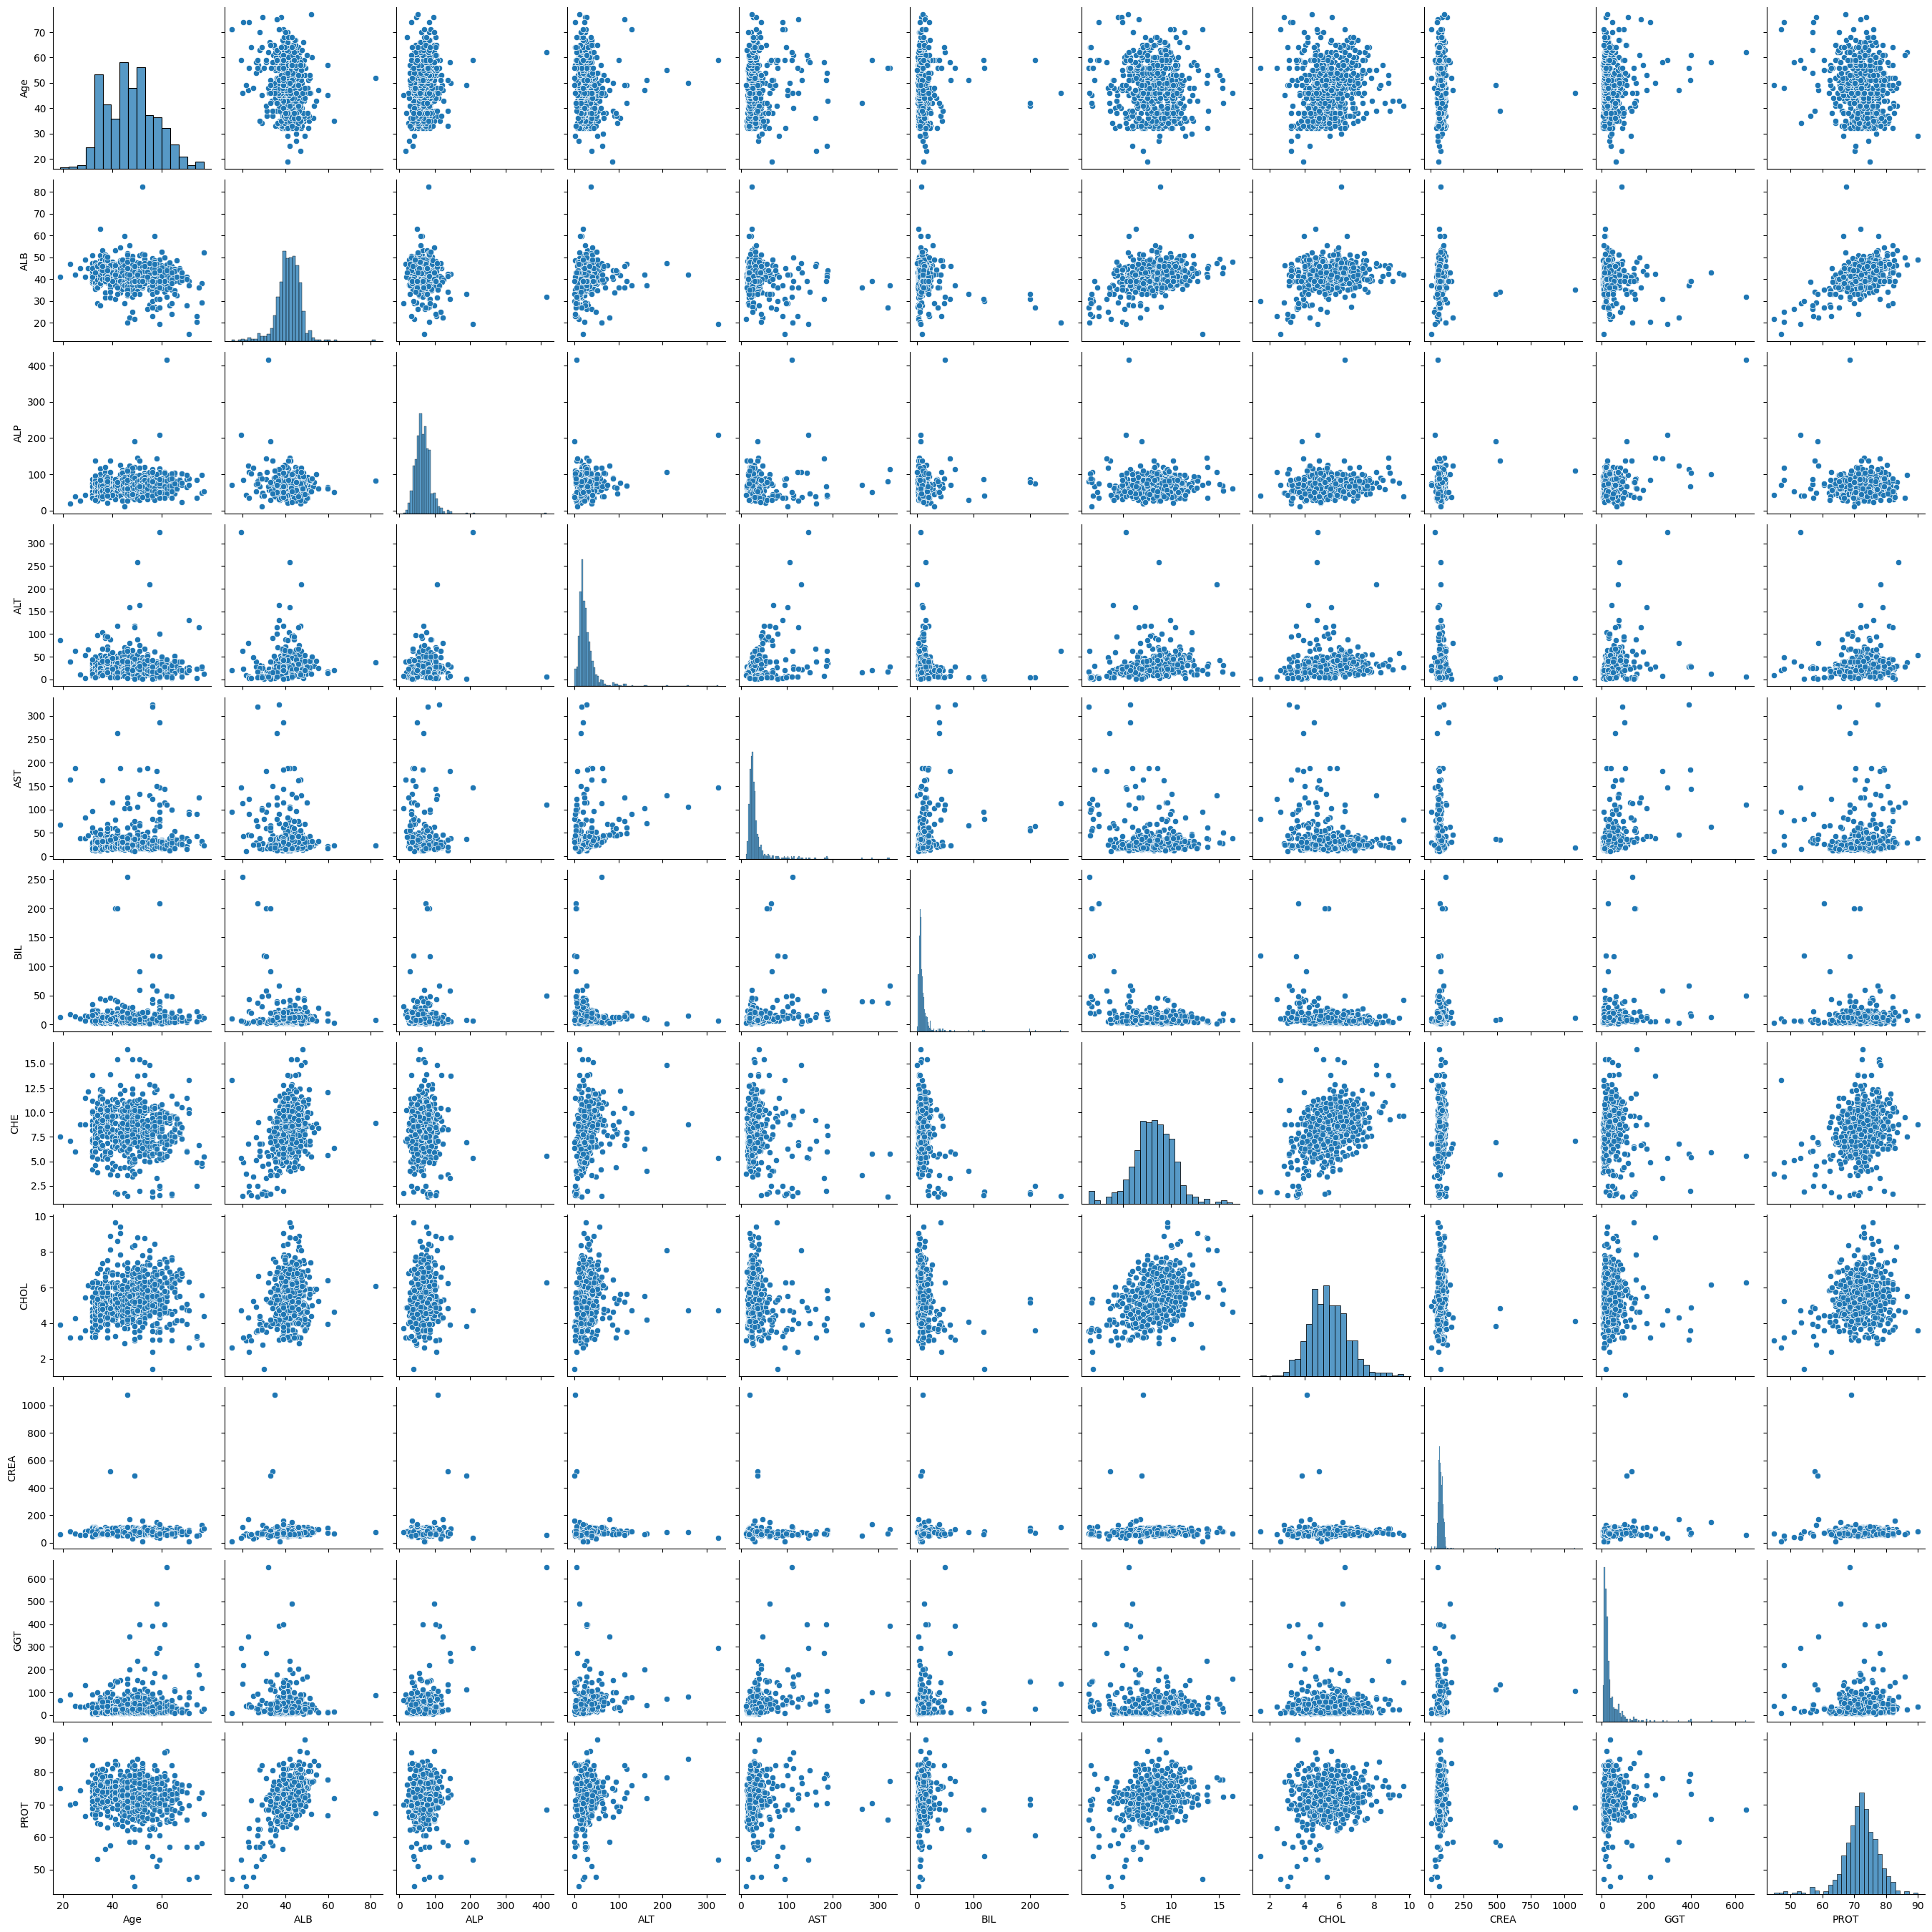

In [40]:
# Scatter Plot com Seaborn - Variação 1 - Gráfico de dispersão que mostra o relacionamento entre os atributos

sns.pairplot(dataset)

Esta variação 1 apresenta na diagonal principal o histograma de cada atributo e nas outras counas o density plot de cada atributo separado por classe.

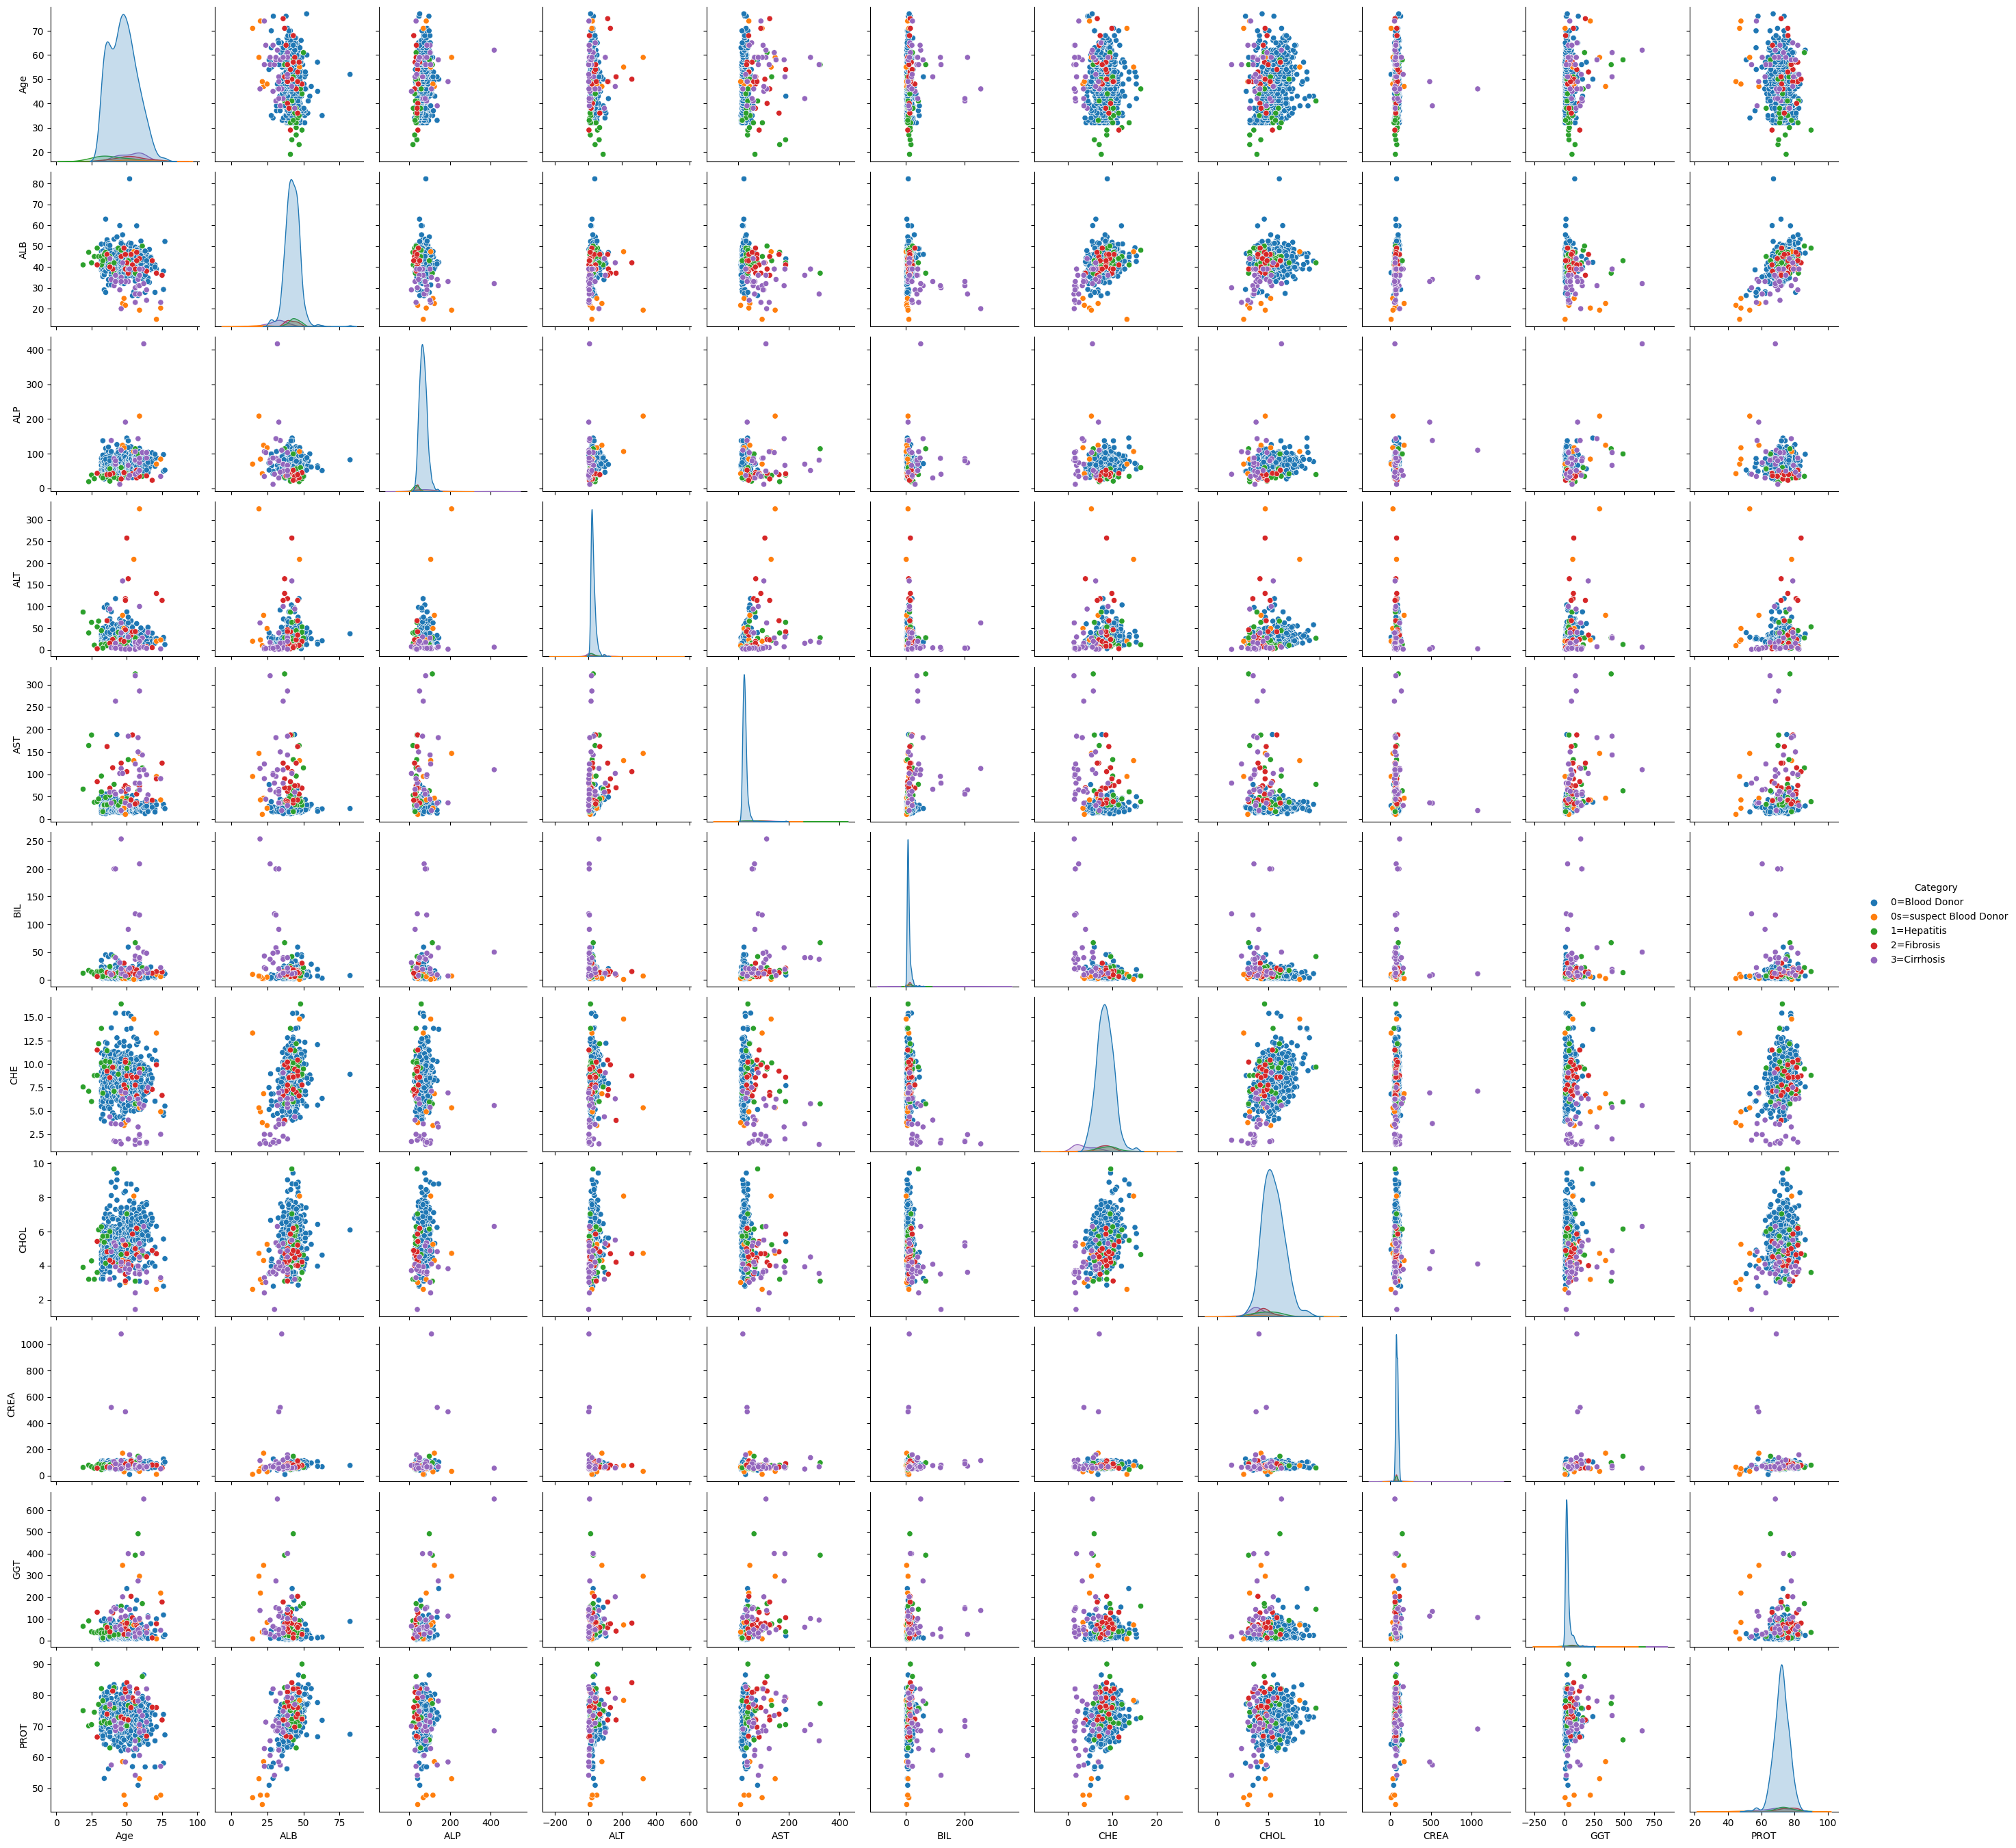

In [42]:
# Scatter Plot com Seaborn - Variação 2 - Faz a divisão pela clase Category

sns.pairplot(dataset, hue = "Category", height = 2.5);

Esta Variação 2 faz a divisão pela classe **Category** separado pelas cores especificadas do lado direito dos gráficos.

#4. Pré-Processamento de Dados
Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

Verifiquei que o datset hcvdata0 possue missings nos atributos ALP,ALT,CHOL e PROT. Vou tratar esses missings e criar uma nova visão do dataset.

In [52]:
# verificando nulls no dataset
dataset.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64